## Fraud Detection
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 01 2024

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [104]:
data = pd.read_csv('C:/Users/abu_s/Desktop/Data/json/fraud detection.csv')

In [105]:
data.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [106]:
df = pd.DataFrame(data)


In [107]:
# Drop sensitive fields
df = df.drop(columns=["Credit_card_number", "Expiry", "Security_code"])


In [108]:
# Preprocess categorical and numerical data
encoder = OneHotEncoder(sparse_output=False)
profession_encoded = encoder.fit_transform(df[["Profession"]])
profession_columns = encoder.get_feature_names_out(["Profession"])
profession_df = pd.DataFrame(profession_encoded, columns=profession_columns)


In [109]:
# Normalize income
scaler = StandardScaler()
income_scaled = scaler.fit_transform(df[["Income"]])


In [110]:
# Combine processed features
X = pd.concat([profession_df, pd.DataFrame(income_scaled, columns=["Income"])], axis=1)
y = df["Fraud"]

## Training

In [112]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train model with Random Forest

In [114]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Prediction

In [116]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



In [117]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.492

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       995
           1       0.49      0.51      0.50      1005

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



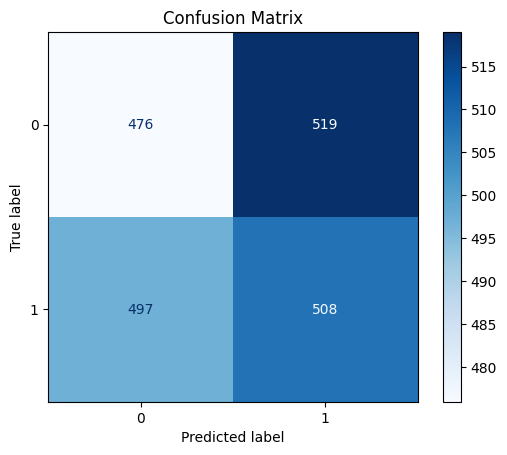

In [118]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Blues")

import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()

### Train model with DecisionTree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [121]:


# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize the Decision Tree Classifier
dt_model.fit(X_train, y_train)  # Train the model



DecisionTreeClassifier(random_state=42)

In [122]:
# Make predictions
y_pred = dt_model.predict(X_test)



In [123]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4945

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       995
           1       0.50      0.51      0.50      1005

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



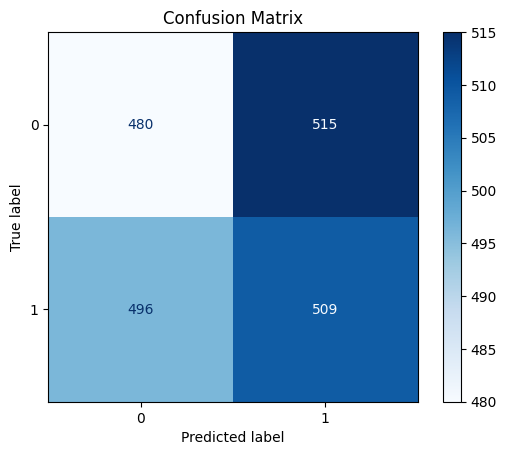

In [124]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Blues")

import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()
